In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

data = pd.read_csv('./weather_classification_data.csv')
data

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location,Weather Type
0,14.0,73,9.5,82.0,partly cloudy,1010.82,2,Winter,3.5,inland,Rainy
1,39.0,96,8.5,71.0,partly cloudy,1011.43,7,Spring,10.0,inland,Cloudy
2,30.0,64,7.0,16.0,clear,1018.72,5,Spring,5.5,mountain,Sunny
3,38.0,83,1.5,82.0,clear,1026.25,7,Spring,1.0,coastal,Sunny
4,27.0,74,17.0,66.0,overcast,990.67,1,Winter,2.5,mountain,Rainy
...,...,...,...,...,...,...,...,...,...,...,...
13195,10.0,74,14.5,71.0,overcast,1003.15,1,Summer,1.0,mountain,Rainy
13196,-1.0,76,3.5,23.0,cloudy,1067.23,1,Winter,6.0,coastal,Snowy
13197,30.0,77,5.5,28.0,overcast,1012.69,3,Autumn,9.0,coastal,Cloudy
13198,3.0,76,10.0,94.0,overcast,984.27,0,Winter,2.0,inland,Snowy


In [3]:
# 查看数据信息
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13200 entries, 0 to 13199
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Temperature           13200 non-null  float64
 1   Humidity              13200 non-null  int64  
 2   Wind Speed            13200 non-null  float64
 3   Precipitation (%)     13200 non-null  float64
 4   Cloud Cover           13200 non-null  object 
 5   Atmospheric Pressure  13200 non-null  float64
 6   UV Index              13200 non-null  int64  
 7   Season                13200 non-null  object 
 8   Visibility (km)       13200 non-null  float64
 9   Location              13200 non-null  object 
 10  Weather Type          13200 non-null  object 
dtypes: float64(5), int64(2), object(4)
memory usage: 1.1+ MB


In [7]:
# 查看分类特征的唯一值
characteristic = ['Cloud Cover','Season','Location','Weather Type']
for i in characteristic:
    print(f'{i}:')
    print(data[i].unique())
    print('-'*47)

Cloud Cover:
['partly cloudy' 'clear' 'overcast' 'cloudy']
-----------------------------------------------
Season:
['Winter' 'Spring' 'Summer' 'Autumn']
-----------------------------------------------
Location:
['inland' 'mountain' 'coastal']
-----------------------------------------------
Weather Type:
['Rainy' 'Cloudy' 'Sunny' 'Snowy']
-----------------------------------------------


In [13]:
sns.set(font='SimHei')  # 设置 Seaborn 默认字体


C:\Users\40450\AppData\Local\Temp\ipykernel_48000\1779972543.py:24: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  plt.tight_layout()
C:\Users\40450\AppData\Local\Temp\ipykernel_48000\1779972543.py:25: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  plt.savefig(save_path, dpi=300, bbox_inches='tight')  # dpi 影响清晰度，bbox_inches 使图像紧凑
D:\Users\40450\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


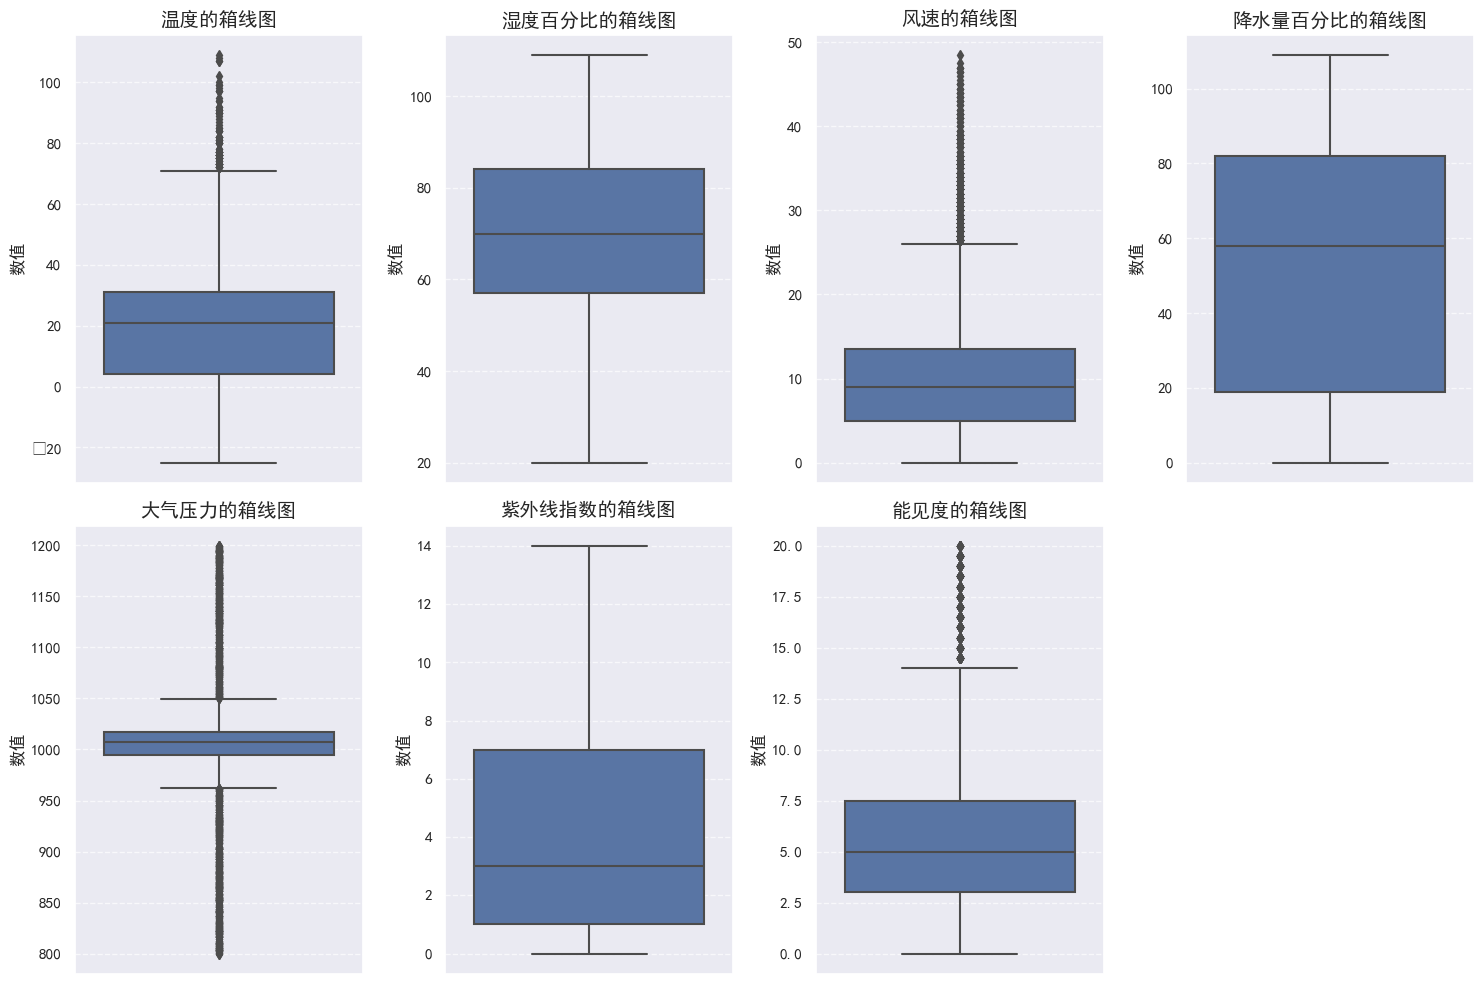

In [30]:
feature_map = {
    'Temperature': '温度',
    'Humidity': '湿度百分比',
    'Wind Speed': '风速',
    'Precipitation (%)': '降水量百分比',
    'Atmospheric Pressure': '大气压力',
    'UV Index': '紫外线指数',
    'Visibility (km)': '能见度'
}
plt.figure(figsize=(15, 10))

for i, (col, col_name) in enumerate(feature_map.items(), 1):
    plt.subplot(2, 4, i)#一整张图片内承两行四列分布小图，i表示子图的索引，从第1张图开始，
    sns.boxplot(y=data[col])#仅绘制Y轴，适用于单变量箱型图
    plt.title(f'{col_name}的箱线图', fontsize=14)
    plt.ylabel('数值', fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.7)#在Y轴添加网格线，--表示虚线，alpha=0.7表示透明

# 保存到指定路径，确保路径存在
save_path = "./boxplot.png"  # Windows 示例
# save_path = "/home/user/output/boxplot.png"  # Linux/macOS 示例


plt.tight_layout()#自动调节子图之间的间距，避免要素重叠
plt.savefig(save_path, dpi=300, bbox_inches='tight')  # dpi 影响清晰度，bbox_inches 去除空白区域
plt.show()#先保存，再显示

In [32]:
#异常值情况
print(f"温度超过60°C的数据量：{data[data['Temperature'] > 60].shape[0]}，占比{round(data[data['Temperature'] > 60].shape[0] / data.shape[0] * 100,2)}%。")
print(f"湿度百分比超过100%的数据量：{data[data['Humidity'] > 100].shape[0]}，占比{round(data[data['Humidity'] > 100].shape[0] / data.shape[0] * 100,2)}%。")
print(f"降雨量百分比超过100%的数据量：{data[data['Precipitation (%)'] > 100].shape[0]}，占比{round(data[data['Precipitation (%)'] > 100].shape[0] / data.shape[0] * 100,2)}%。")

温度超过60°C的数据量：207，占比1.57%。
湿度百分比超过100%的数据量：416，占比3.15%。
降雨量百分比超过100%的数据量：392，占比2.97%。


In [34]:
#上一个cell可知异常值占比很小，可直接删除
print("删前的数据shape：", data.shape)
data = data[(data['Temperature'] <= 60) & (data['Humidity'] <= 100) & (data['Precipitation (%)'] <= 100)]
print("删后的数据shape：", data.shape)

删前的数据shape： (13200, 11)
删后的数据shape： (12360, 11)


In [36]:
#数据分析
data.describe(include='all')

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location,Weather Type
count,12360.000000,12360.000000,12360.000000,12360.000000,12360,12360.000000,12360.000000,12360,12360.000000,12360,12360
unique,NaN,NaN,NaN,NaN,4,NaN,NaN,4,NaN,3,4
top,NaN,NaN,NaN,NaN,overcast,NaN,NaN,Winter,NaN,mountain,Snowy
freq,NaN,NaN,NaN,NaN,5726,NaN,NaN,5288,NaN,4535,3130
mean,18.071359,66.937460,9.356837,50.864968,NaN,1005.713743,3.791262,NaN,5.535801,NaN,NaN
std,15.804363,19.390333,6.318334,30.967846,NaN,38.300471,3.720638,NaN,3.377554,NaN,NaN
min,-24.000000,20.000000,0.000000,0.000000,NaN,800.120000,0.000000,NaN,0.000000,NaN,NaN
25%,4.000000,56.000000,5.000000,19.000000,NaN,994.587500,1.000000,NaN,3.000000,NaN,NaN
50%,21.000000,69.000000,8.500000,54.000000,NaN,1007.495000,2.000000,NaN,5.000000,NaN,NaN
75%,30.000000,81.000000,13.000000,79.000000,NaN,1016.750000,6.000000,NaN,7.500000,NaN,NaN


C:\Users\40450\AppData\Local\Temp\ipykernel_48000\1706930891.py:66: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  plt.tight_layout()
D:\Users\40450\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


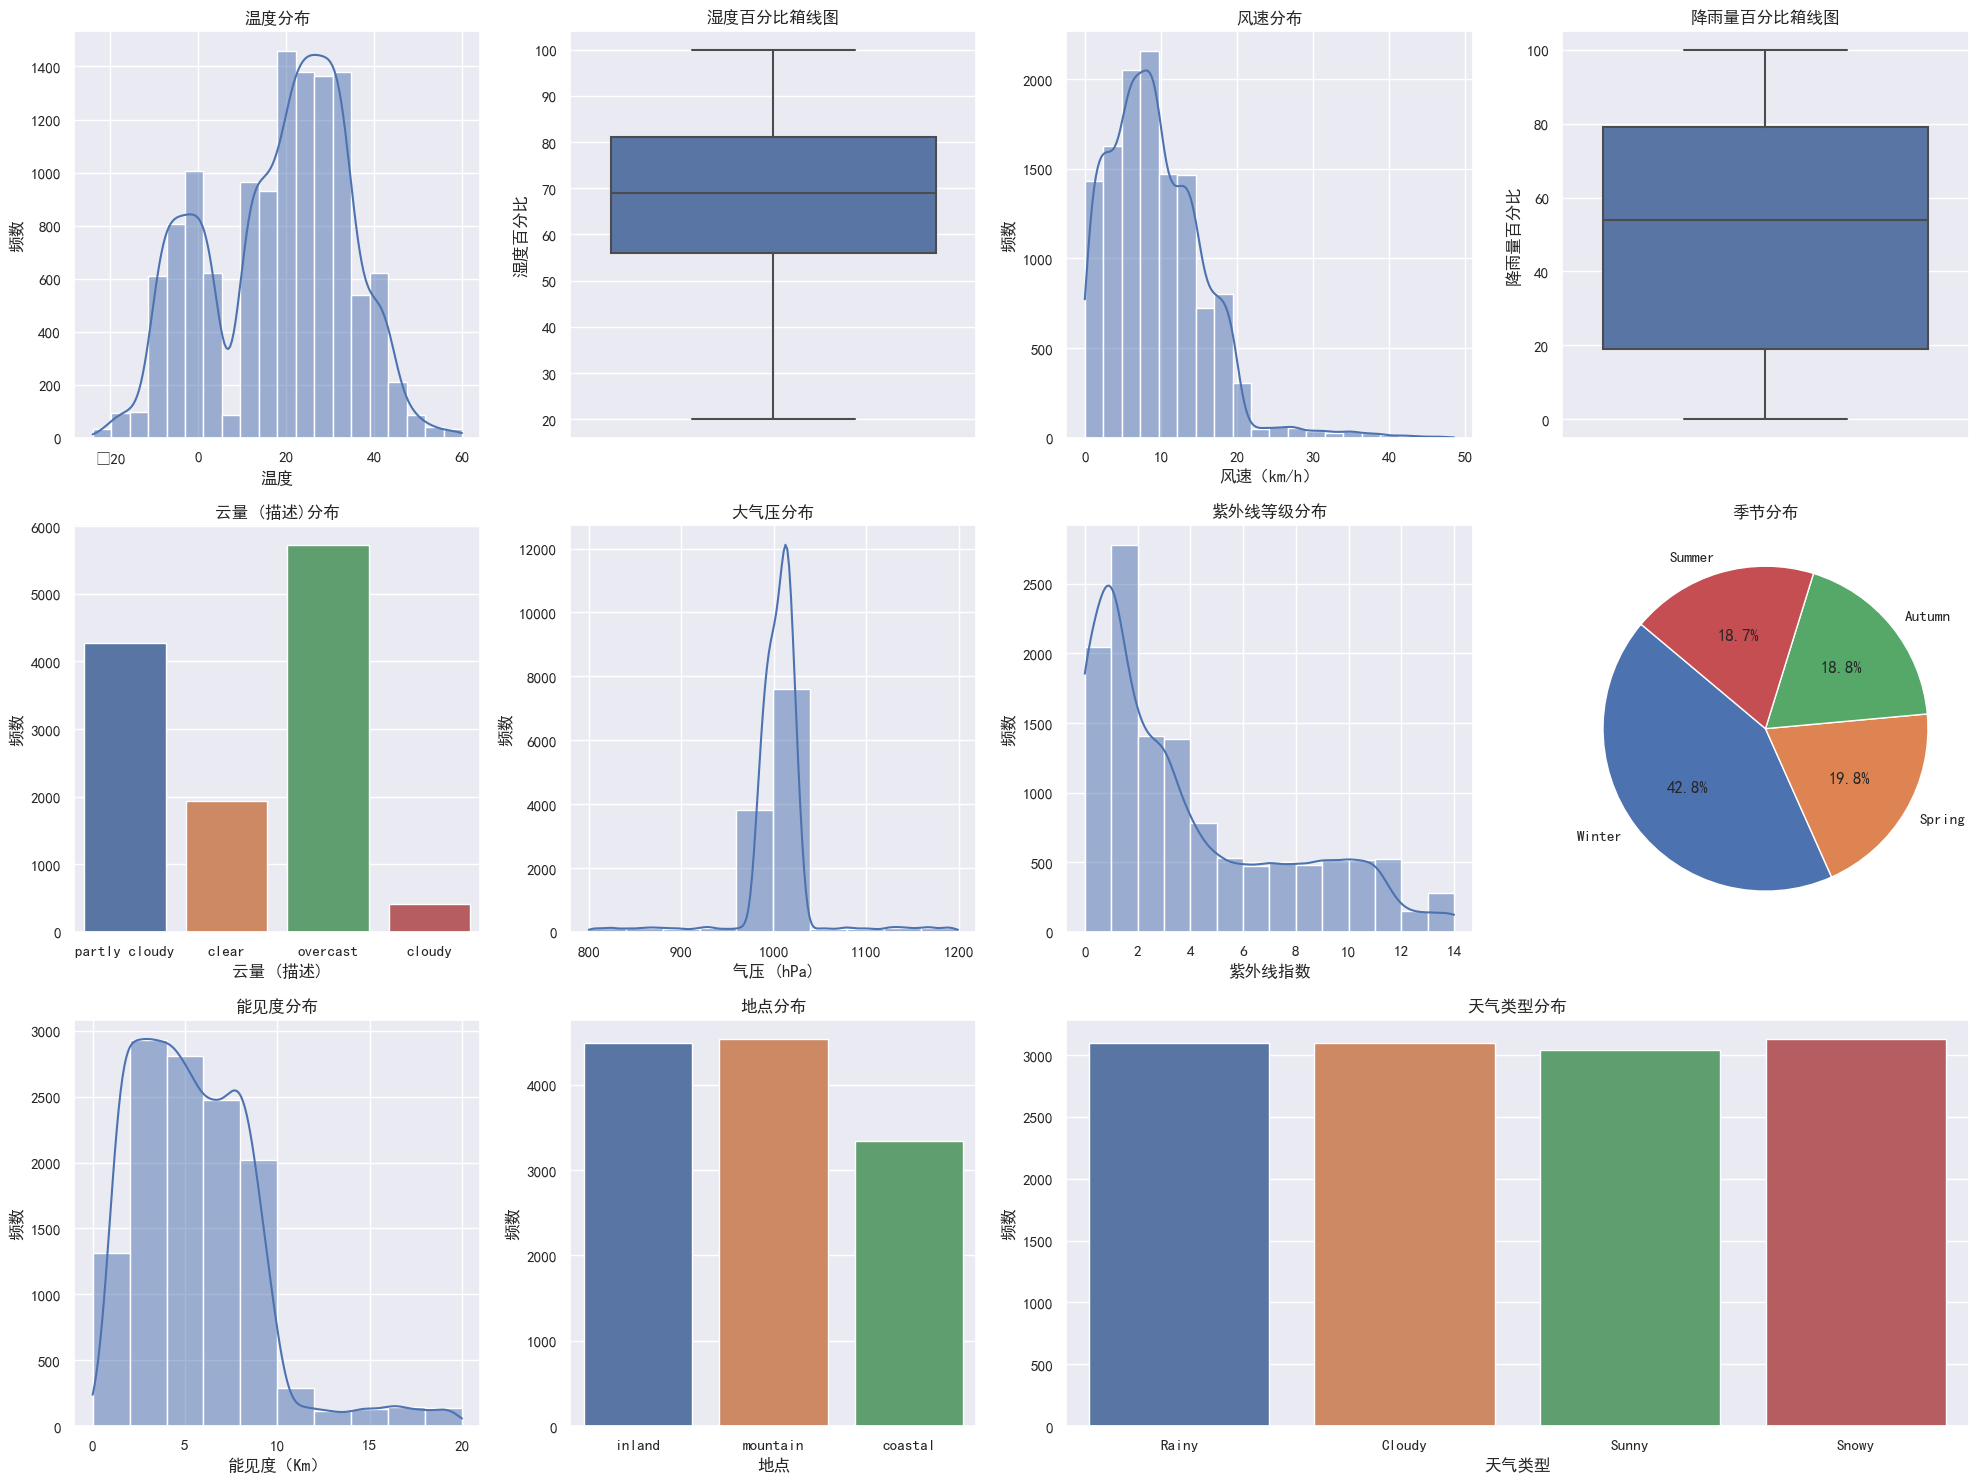

In [38]:
plt.figure(figsize=(20, 15))
plt.subplot(3, 4, 1)
sns.histplot(data['Temperature'], kde=True,bins=20)
#hist默认绘制直方图，显示数据情况，bins = 10 表示将数据分为 10 组，kde=ture启用核密度估计（KDE）曲线 ，用平滑曲线估计数据的概率密度分布;默认 kde=False，只有柱状图，如加上 kde=True 会额外绘制一条平滑的曲线，反映数据趋势
plt.title('温度分布')
plt.xlabel('温度')
plt.ylabel('频数')

plt.subplot(3, 4, 2)
sns.boxplot(y=data['Humidity'])
plt.title('湿度百分比箱线图')
plt.ylabel('湿度百分比')

plt.subplot(3, 4, 3)
sns.histplot(data['Wind Speed'], kde=True,bins=20)
plt.title('风速分布')
plt.xlabel('风速（km/h）')
plt.ylabel('频数')

plt.subplot(3, 4, 4)
sns.boxplot(y=data['Precipitation (%)'])
plt.title('降雨量百分比箱线图')
plt.ylabel('降雨量百分比')

plt.subplot(3, 4, 5)
sns.countplot(x='Cloud Cover', data=data)
plt.title('云量 (描述)分布')
plt.xlabel('云量 (描述)')
plt.ylabel('频数')

plt.subplot(3, 4, 6)
sns.histplot(data['Atmospheric Pressure'], kde=True,bins=10)
plt.title('大气压分布')
plt.xlabel('气压 (hPa)')
plt.ylabel('频数')

plt.subplot(3, 4, 7)
sns.histplot(data['UV Index'], kde=True,bins=14)
plt.title('紫外线等级分布')
plt.xlabel('紫外线指数')
plt.ylabel('频数')

plt.subplot(3, 4, 8)
Season_counts = data['Season'].value_counts()
plt.pie(Season_counts, labels=Season_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('季节分布')

plt.subplot(3, 4, 9)
sns.histplot(data['Visibility (km)'], kde=True,bins=10)
plt.title('能见度分布')
plt.xlabel('能见度（Km）')
plt.ylabel('频数')

plt.subplot(3, 4, 10)
sns.countplot(x='Location', data=data)
plt.title('地点分布')
plt.xlabel('地点')
plt.ylabel('频数')

plt.subplot(3, 4, (11,12))
sns.countplot(x='Weather Type', data=data)
plt.title('天气类型分布')
plt.xlabel('天气类型')
plt.ylabel('频数')

plt.tight_layout()
plt.show()

In [40]:
#开始随机森林
new_data = data.copy()#创建data副本，防止修改源数据
label_encoders = {}#存储每个特征的 LabelEncoder 实例，方便后续解码
categorical_features = ['Cloud Cover', 'Season', 'Location', 'Weather Type']#指定需要编码的分类特征（类别型变量）
for feature in categorical_features:#对每个分类特征进行 Label Encoding，for循环遍历
    le = LabelEncoder()#创建实例
    new_data[feature] = le.fit_transform(data[feature])#进行转换，文本类别转换为数字，如fall=1，spring=2等等
    label_encoders[feature] = le#存储 LabelEncoder 对象，以便后续解码

#打印
for feature in categorical_features:
    print(f"'{feature}'特征的对应关系：")
    for index, class_ in enumerate(label_encoders[feature].classes_):#enumerate生成 索引-类别对儿，如1：fall
        print(f"  {index}: {class_}")

'Cloud Cover'特征的对应关系：
  0: clear
  1: cloudy
  2: overcast
  3: partly cloudy
'Season'特征的对应关系：
  0: Autumn
  1: Spring
  2: Summer
  3: Winter
'Location'特征的对应关系：
  0: coastal
  1: inland
  2: mountain
'Weather Type'特征的对应关系：
  0: Cloudy
  1: Rainy
  2: Snowy
  3: Sunny


In [42]:
# 构建x，y
x = new_data.drop(['Weather Type'],axis=1)#axis=0表示删除行，axis=1表示删除列
y = new_data['Weather Type']

# 划分数据集
x_train,x_test,y_train,y_test = train_test_split(x,y,
                                                 test_size=0.3,
                                                 random_state=15) 

# 构建随机森林模型
rf_clf = RandomForestClassifier(random_state=15)
rf_clf.fit(x_train, y_train)

RandomForestClassifier(random_state=15)

In [44]:
# 使用随机森林进行预测
y_pred_rf = rf_clf.predict(x_test)
class_report_rf = classification_report(y_test, y_pred_rf)
print(class_report_rf)

              precision    recall  f1-score   support

           0       0.88      0.91      0.89       871
           1       0.93      0.91      0.92       983
           2       0.92      0.93      0.92       929
           3       0.92      0.90      0.91       925

    accuracy                           0.91      3708
   macro avg       0.91      0.91      0.91      3708
weighted avg       0.91      0.91      0.91      3708



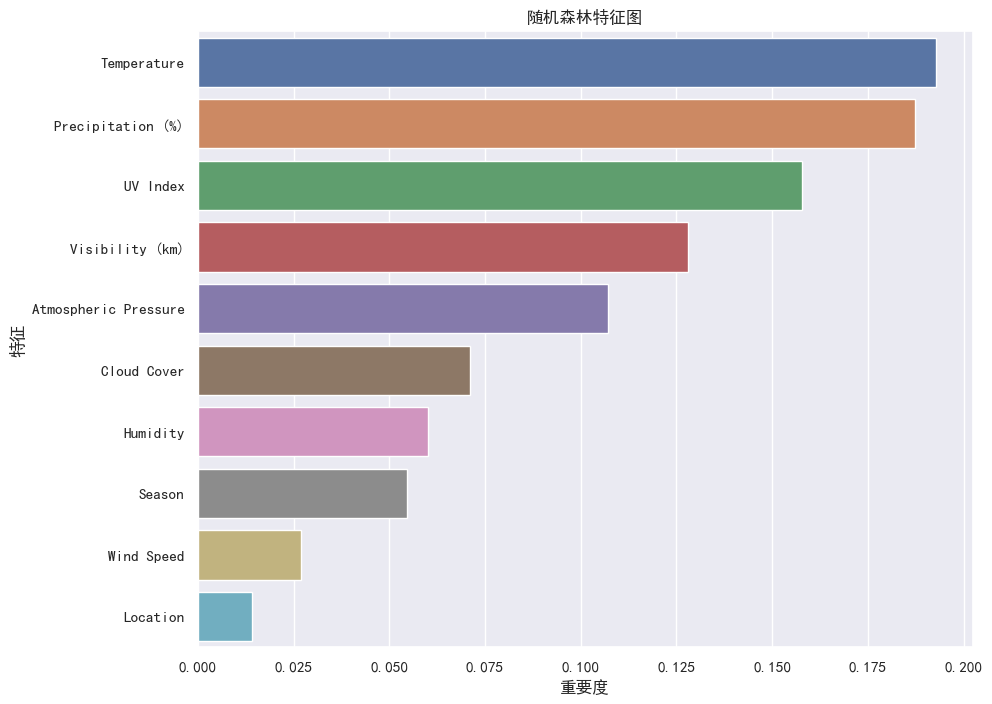

In [46]:
feature_importances = rf_clf.feature_importances_
features_rf = pd.DataFrame({'特征': x.columns, '重要度': feature_importances})#创建dataframe
features_rf.sort_values(by='重要度', ascending=False, inplace=True)#按照重要度排序
plt.figure(figsize=(10, 8))
sns.barplot(x='重要度', y='特征', data=features_rf)#绘制条形图
plt.xlabel('重要度')
plt.ylabel('特征')
plt.title('随机森林特征图')
plt.show()